<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW6/Project_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing necessary libraries and the data set
---

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix



adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")


###Setting up the DF and plotting income
---

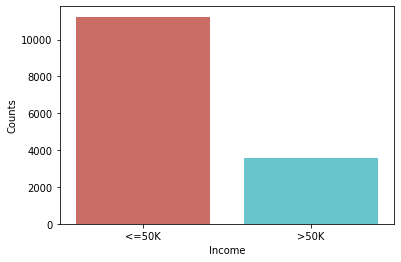

In [2]:
#Setup DF and create the split

#Create the predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])
#New DF with only relevant information
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

#Plot
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

###Creating encoded dataset
---

In [3]:
#Ecode the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


###Creating the train-test split with the encoded data and plotting frequencies
---

Training size: (11837, 2)
Test size: (2960, 2)


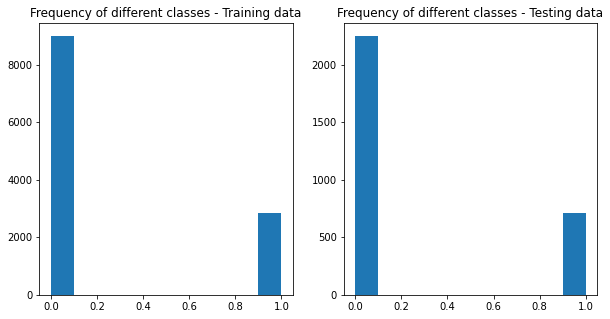

In [4]:
#Create the split
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

#Plot the class definitions
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

###Creating the 4 functions
---


In [14]:
#Create first function
def makeDTModel(crit, xData, yData, maxNodes):
  return DecisionTreeClassifier(criterion = crit,
                                         max_leaf_nodes = maxNodes,
                                         random_state = 120).fit(xData, yData)
#Second Function
def displayTree(classifier,xVal,depth):
  from matplotlib.pyplot import figure
  figure(figsize=(12, 10), dpi=80)
  tree.plot_tree(classifier, feature_names=xVal.columns.values.tolist(), class_names=['low_income', 'hi_income'], filled=True, max_depth=depth)


  # Print the text version of the tree
  text_representation = tree.export_text(classifier, 
                                        feature_names=xVal.columns.values.tolist())
  print(text_representation)

#Third Function
def displayCM(classifier, xTrain, yTrain, xTest, yTest):
  #create prediction
  predict = classifier.predict(xTest)
  #create CM
  cm = confusion_matrix(y_true=yTest, 
                           y_pred = predict)
  print(cm)
  import seaborn as sns

  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, 
              linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#Fourth Function
def compareModels(cart_class, c5_class):
  import matplotlib
  import matplotlib.pyplot as plt
  import numpy as np

  score1 = round(cart_class.score(X_train, y_train), 2) # training score
  score2 = round(cart_class.score(X_test, y_test), 2) 

  score3 = round(c5_class.score(X_train, y_train), 2) # training score
  score4 = round(c5_class.score(X_test, y_test), 2)

  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()


###Creating the cart classifier using the first function and displaying with the second function
---

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



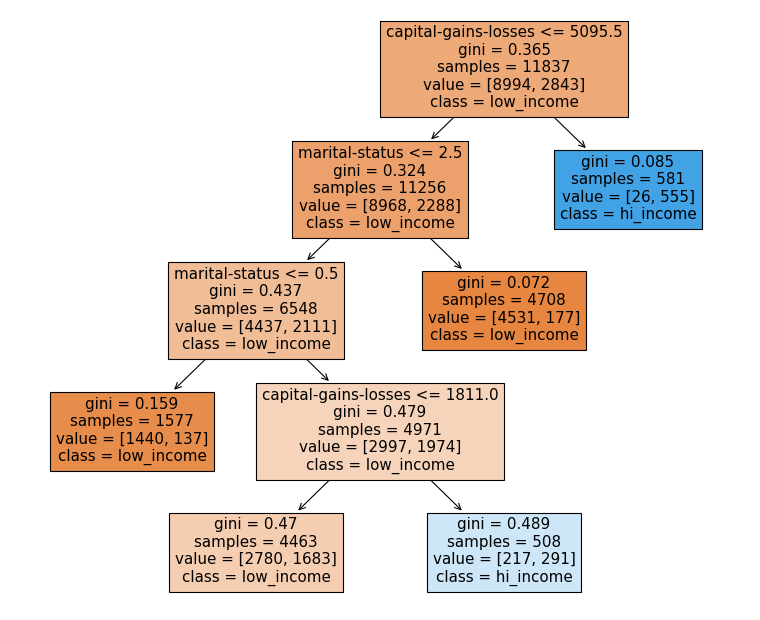

In [6]:
#Call the functions
cart_classifier = makeDTModel("gini",X_train,y_train,5)
displayTree(cart_classifier,X,None)

###Creating the c5 classifier with the first function and displaying with the second function
---

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



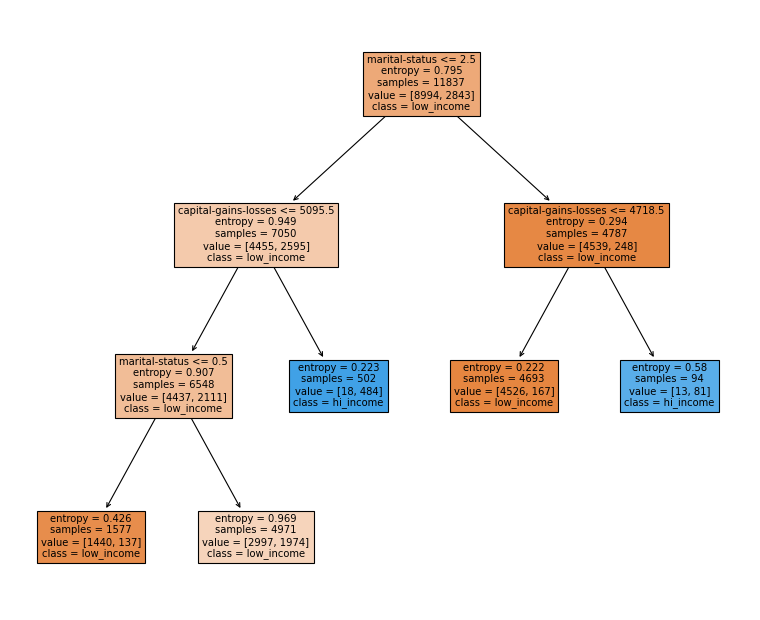

In [7]:
#Call the functions again
c5_classifier = makeDTModel('entropy',X_train,y_train,5)
displayTree(c5_classifier,X,None)

###Displaying the confusion matrix for each
---

[[2187   62]
 [ 511  200]]
[[2235   14]
 [ 583  128]]


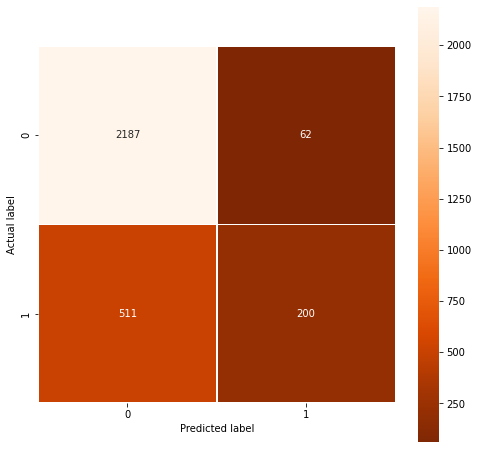

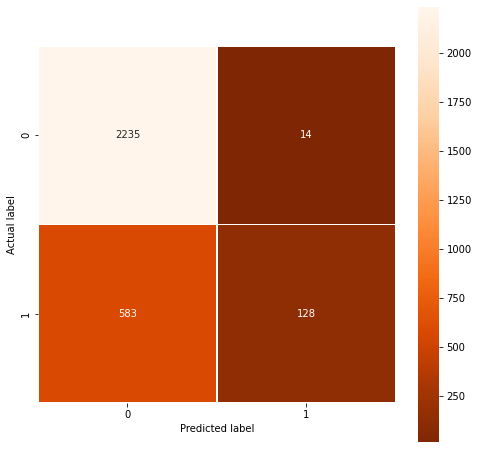

In [13]:
#Display confusion matrix
displayCM(cart_classifier,X_train,y_train,X_test,y_test)
displayCM(c5_classifier,X_train,y_train,X_test,y_test)

###Comparing both models
---

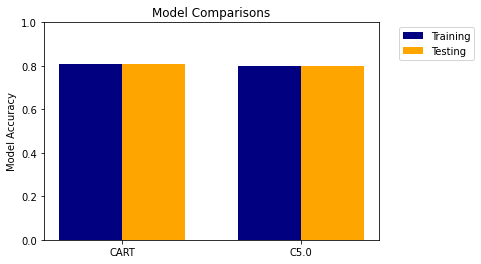

In [15]:
#Display the model comparison
compareModels(cart_classifier,c5_classifier)

###Testing different values for leaf nodes and depth
---
started by testing None for each then used a nested for loop to test all of the other possibilities. For each possibility I displayed the trees, displayed the confusion matrices, and compared the two models.

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital-gains-losses >  1748.0

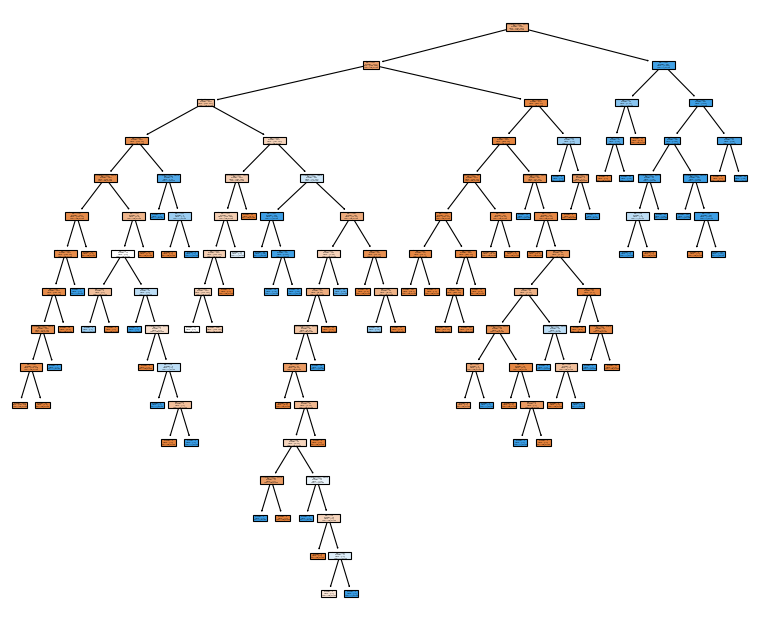

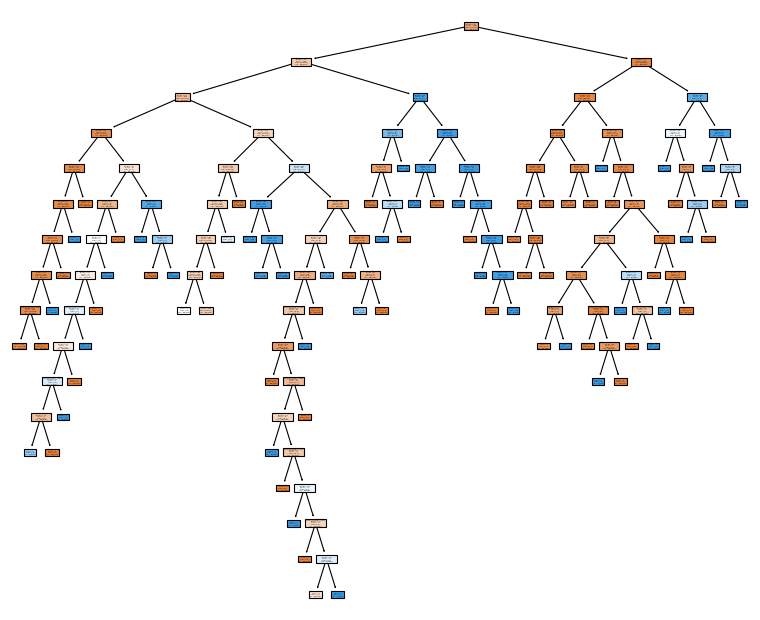

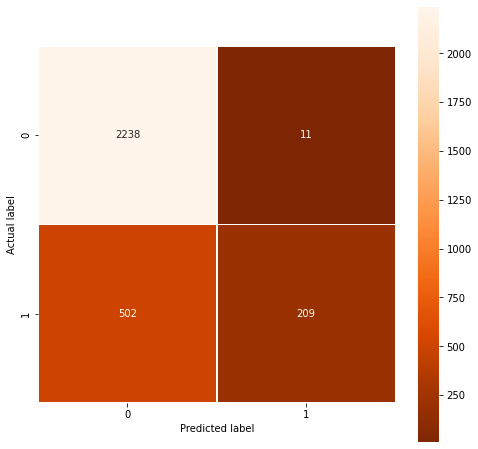

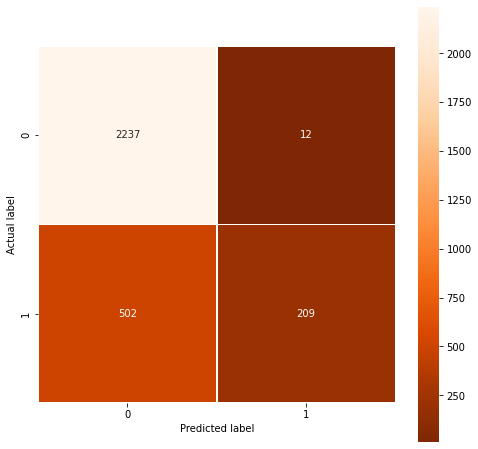

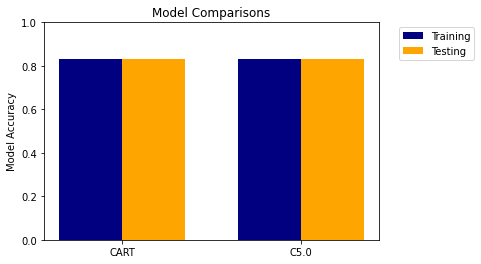

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


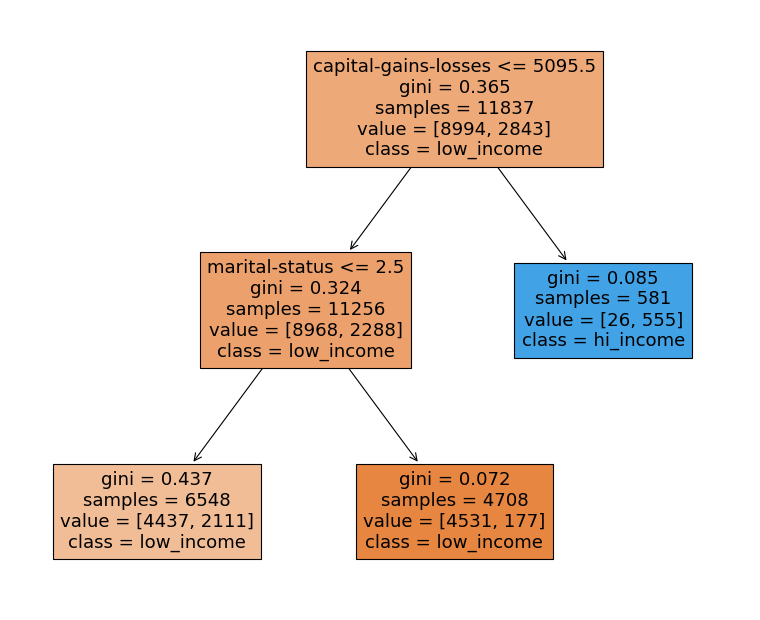

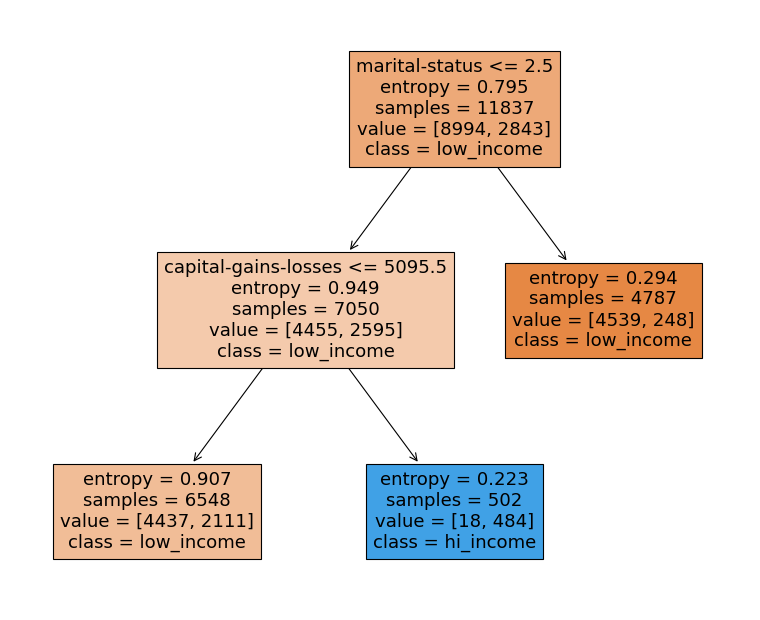

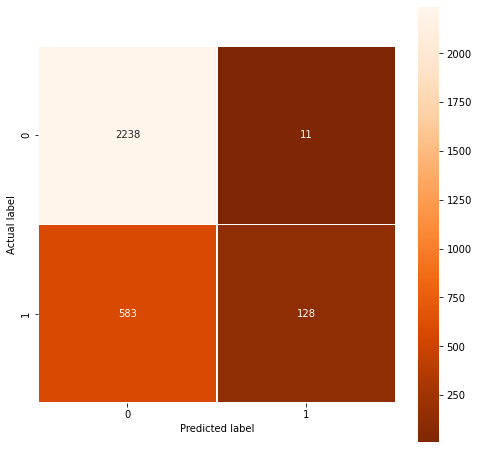

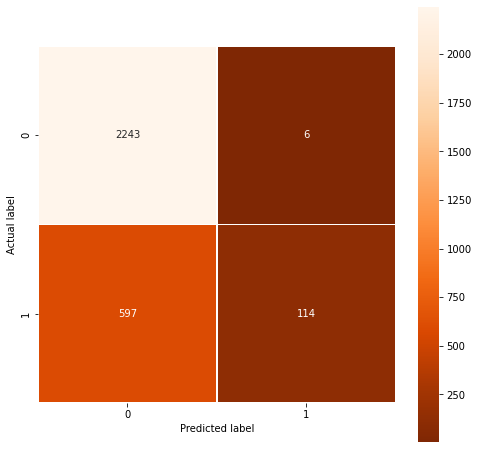

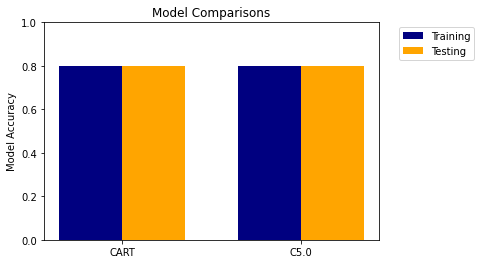

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


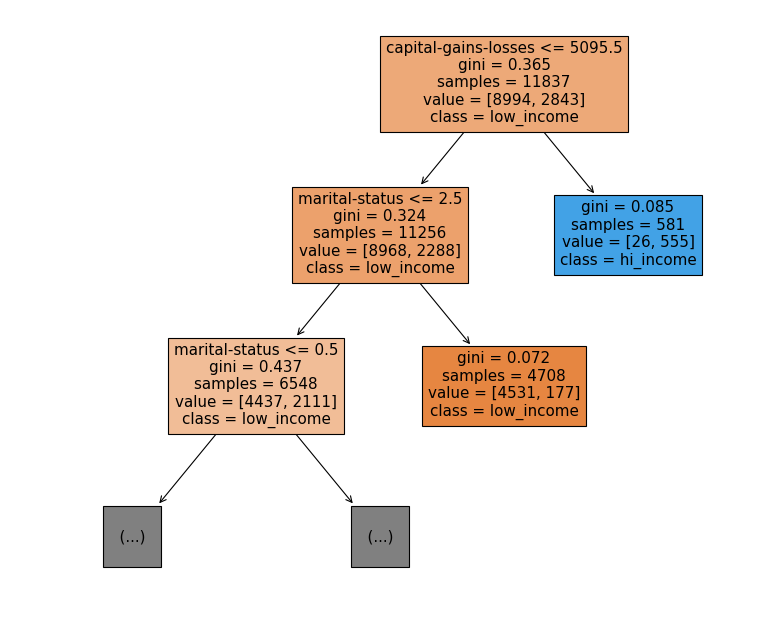

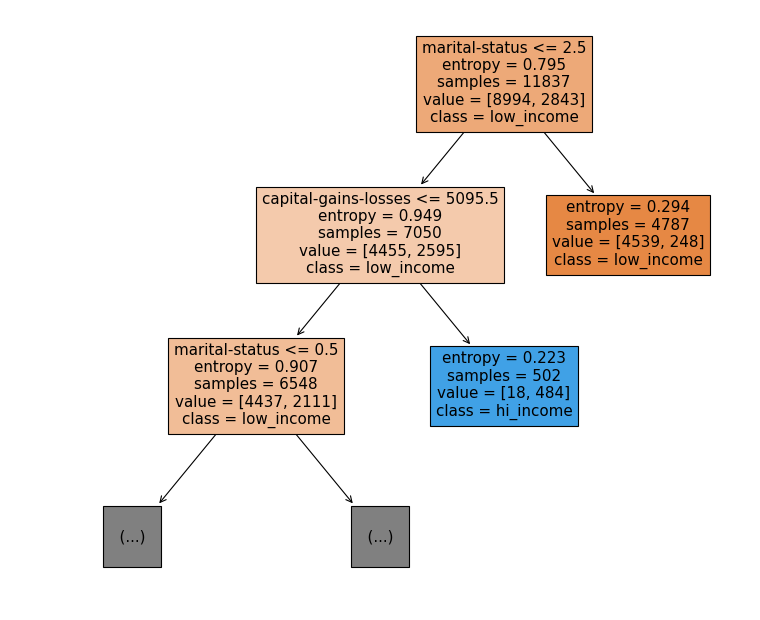

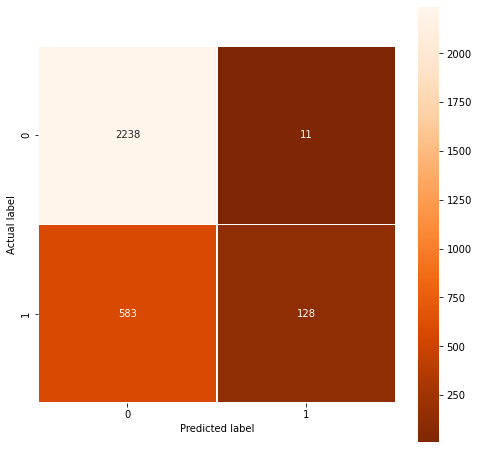

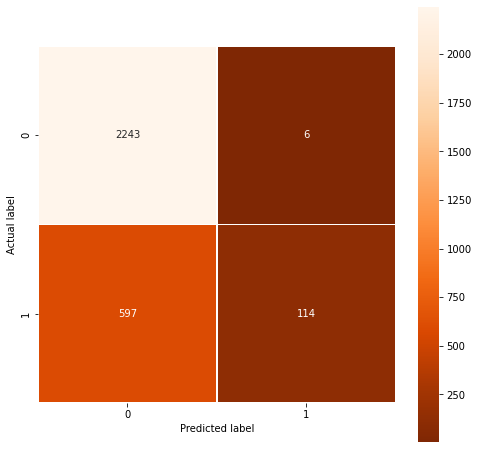

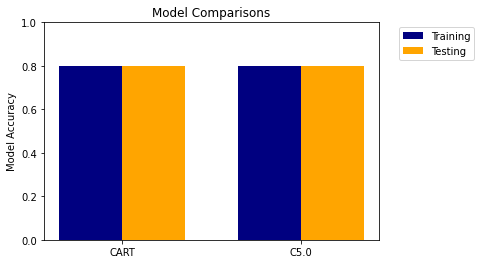

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1

[[2187   62]
 [ 511  200]]
[[2235   14]
 [ 583  128]]


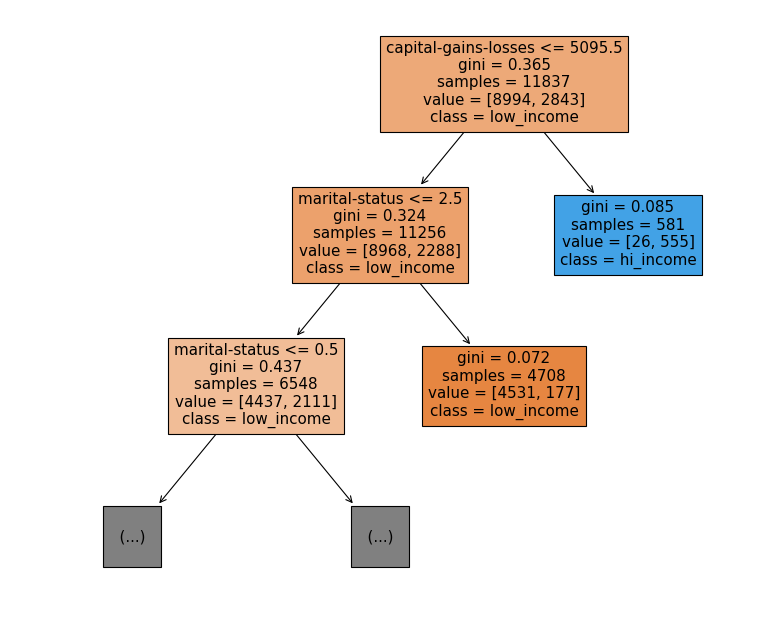

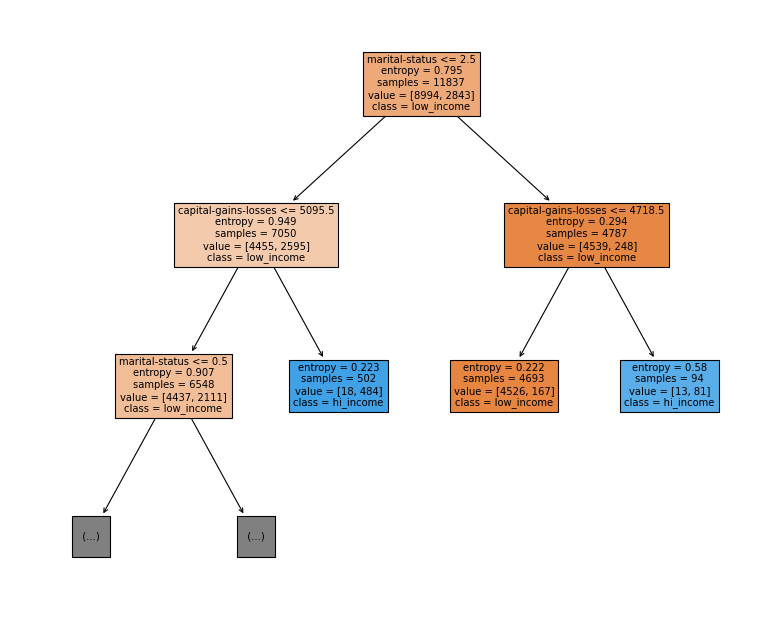

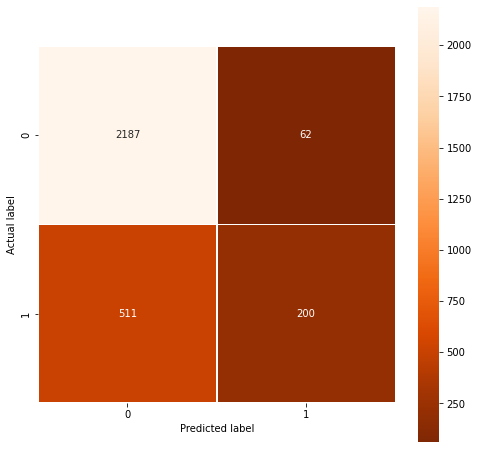

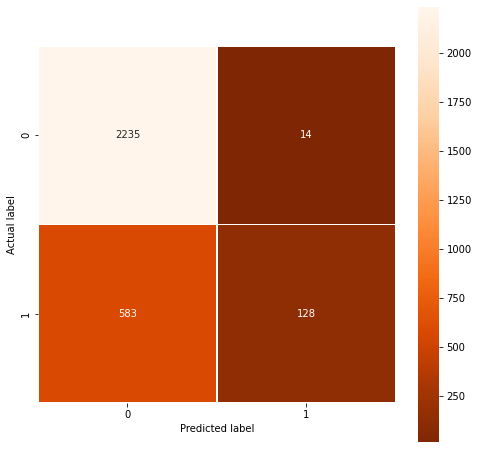

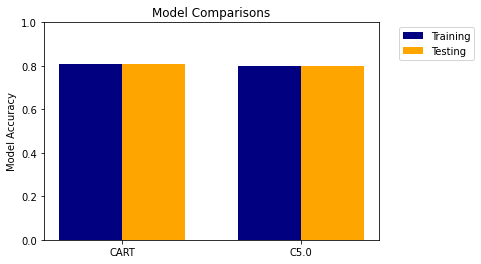

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


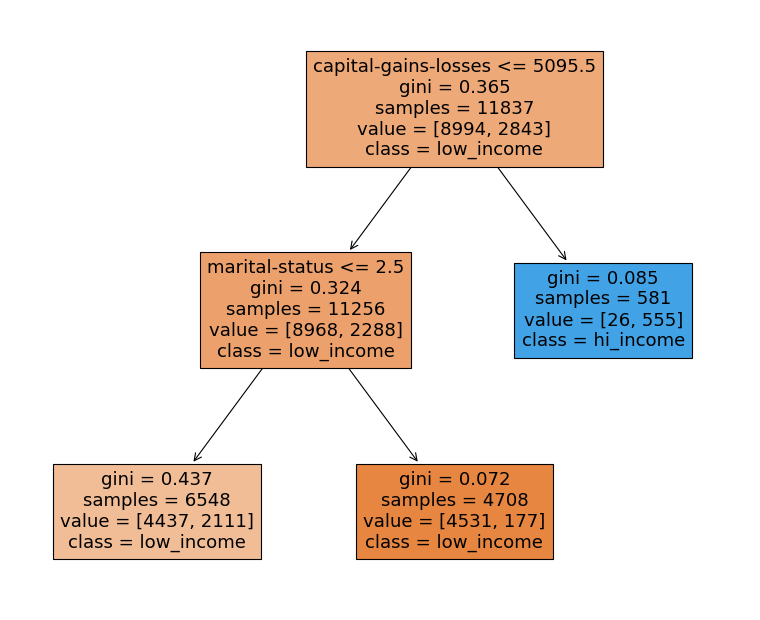

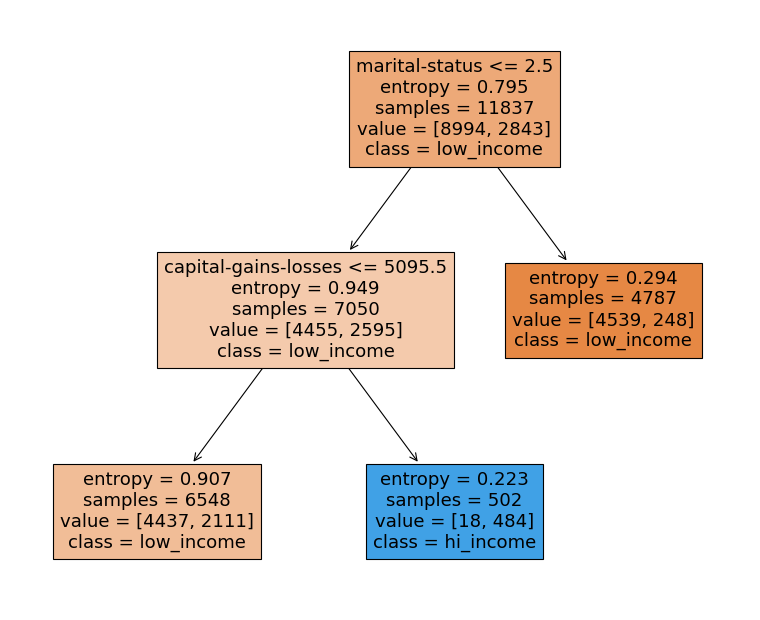

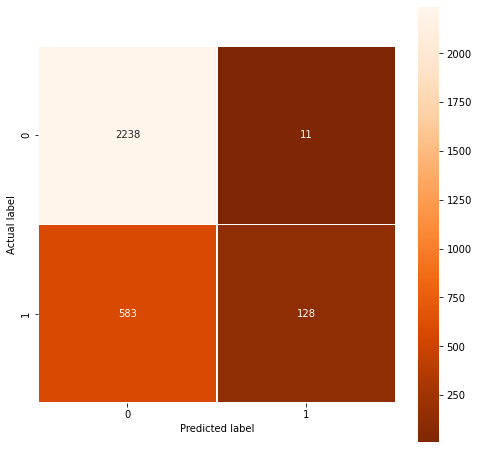

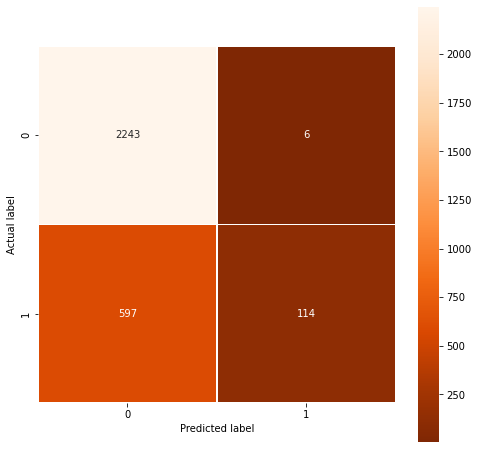

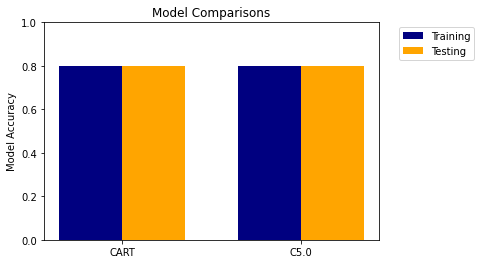

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


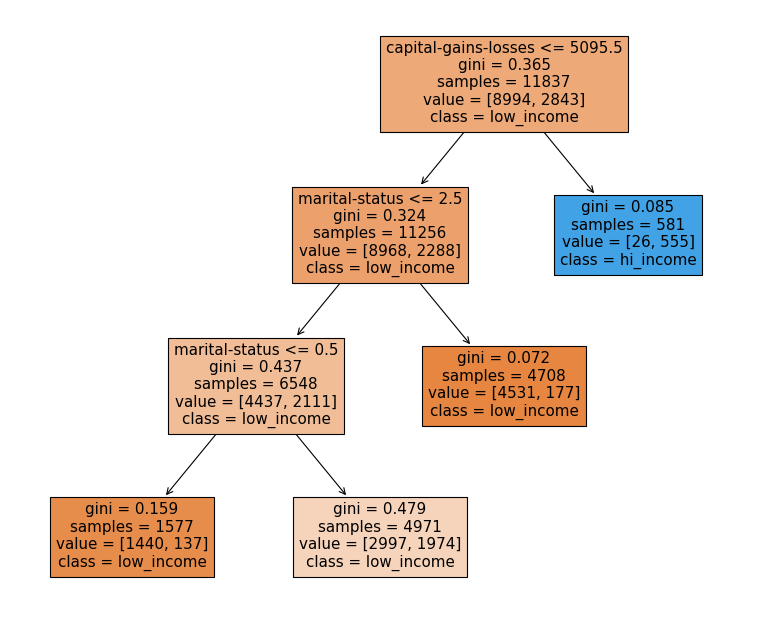

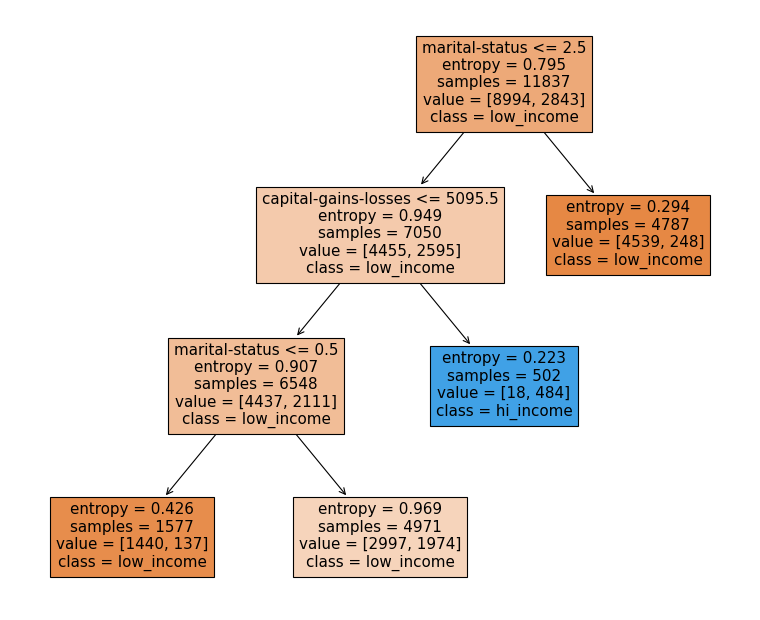

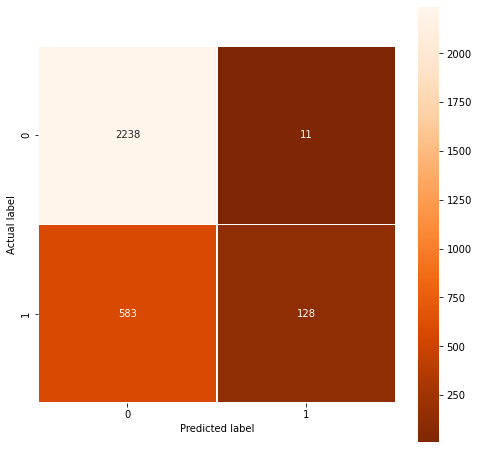

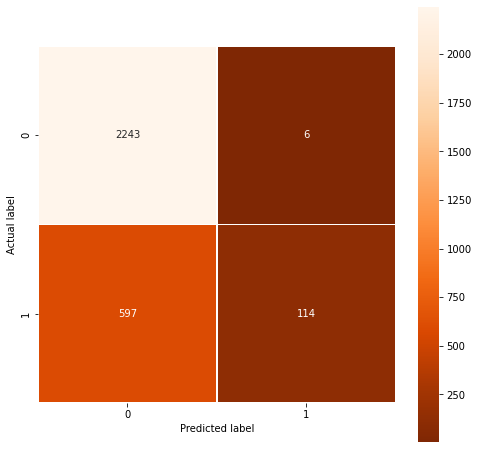

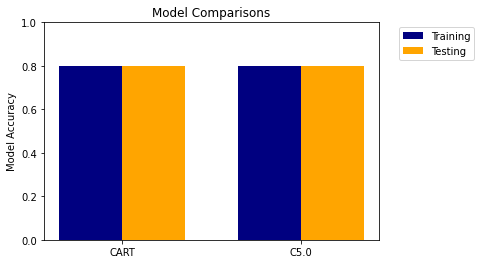

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1

[[2187   62]
 [ 511  200]]
[[2235   14]
 [ 583  128]]


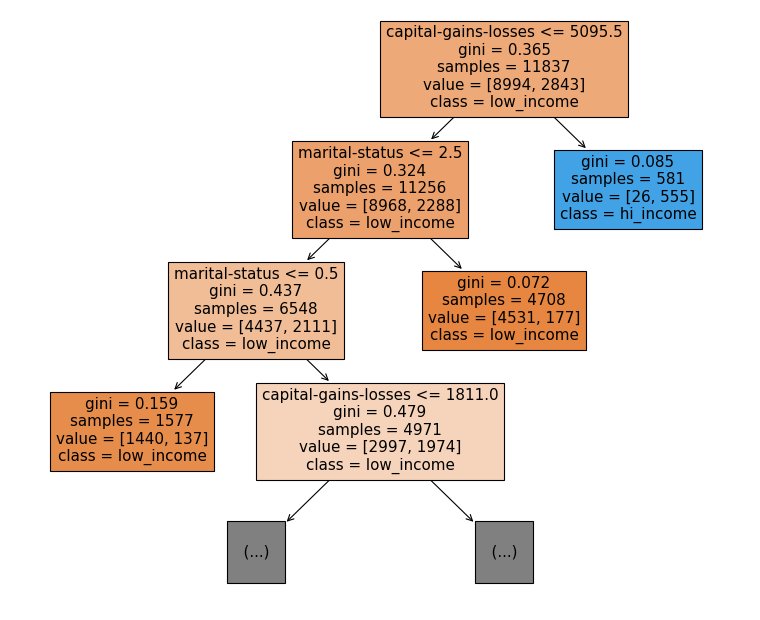

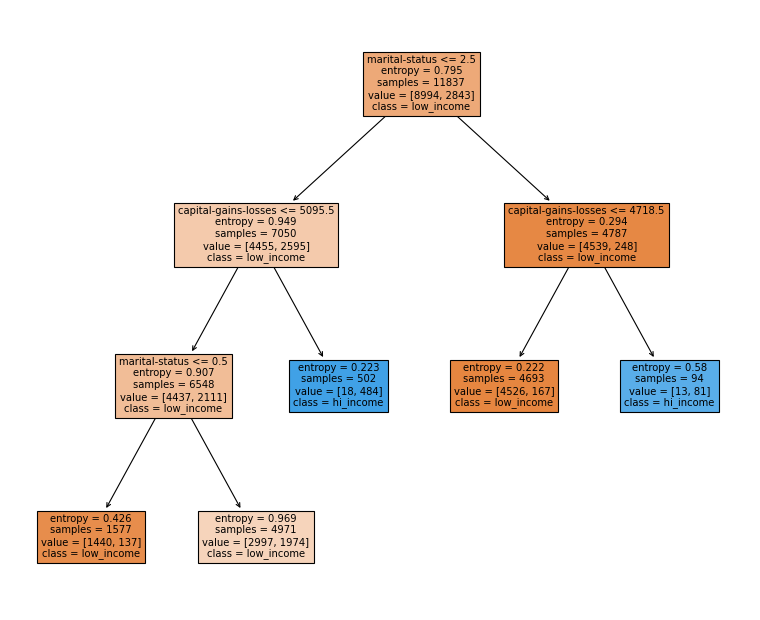

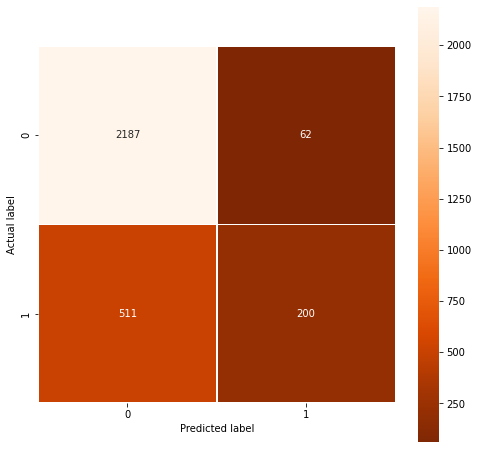

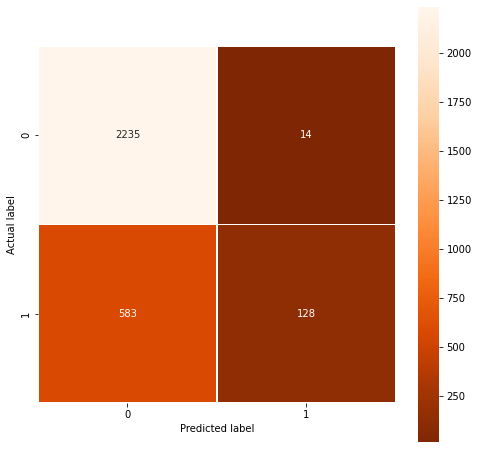

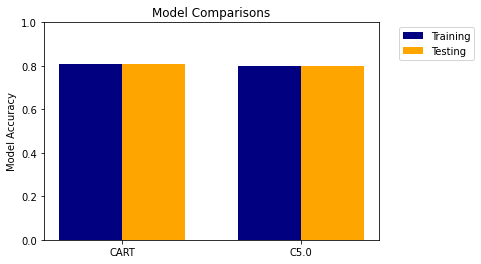

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


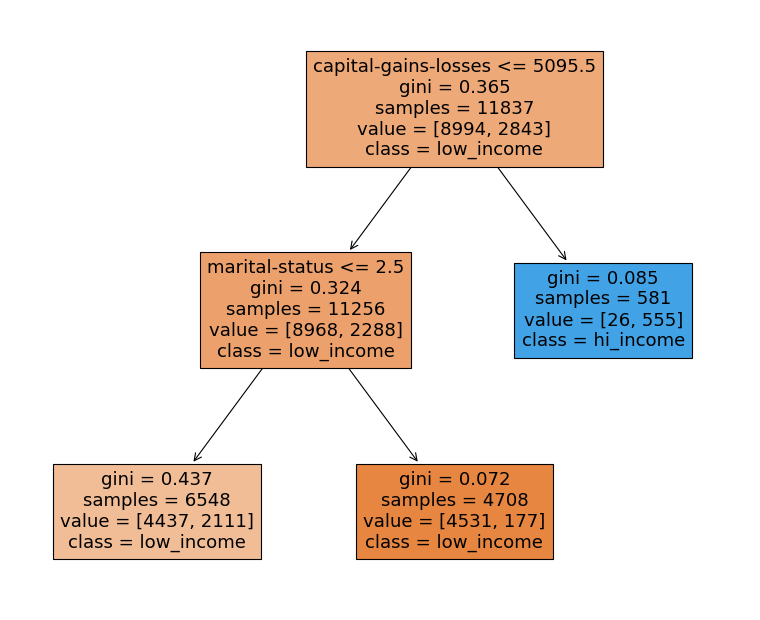

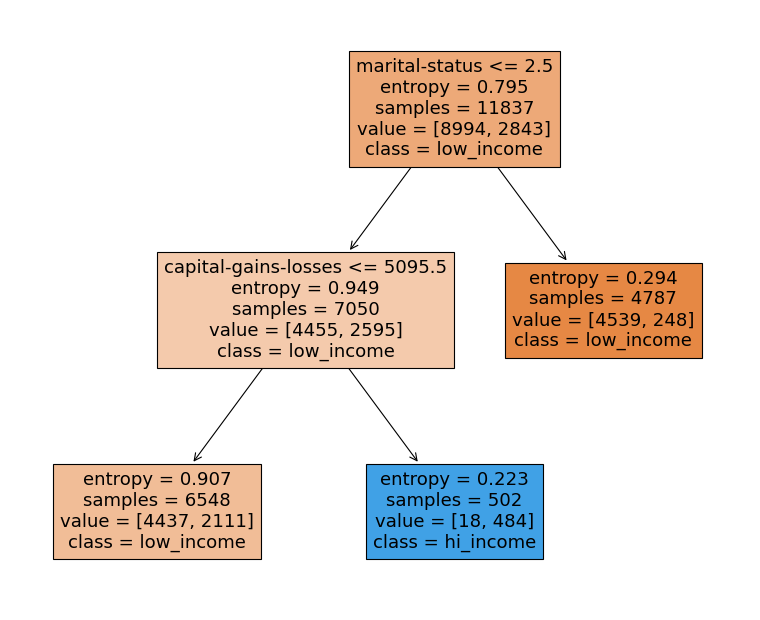

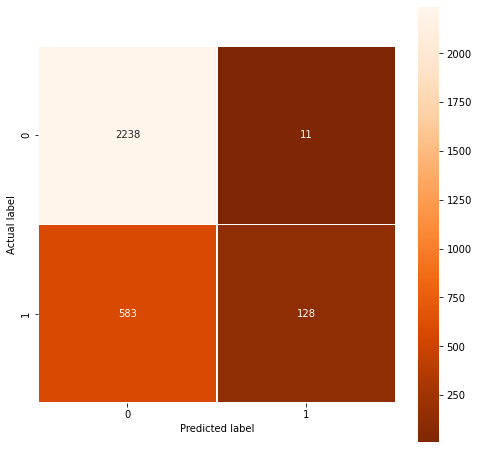

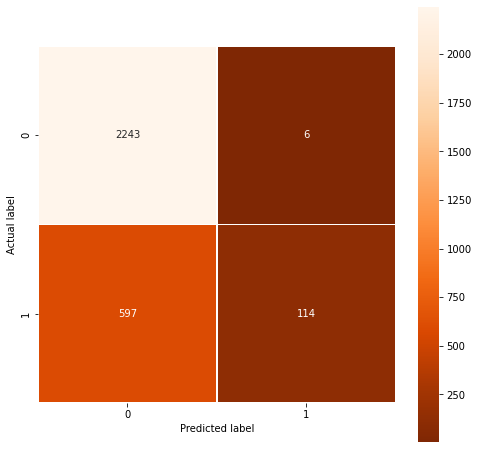

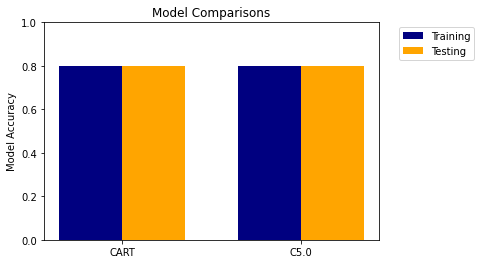

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


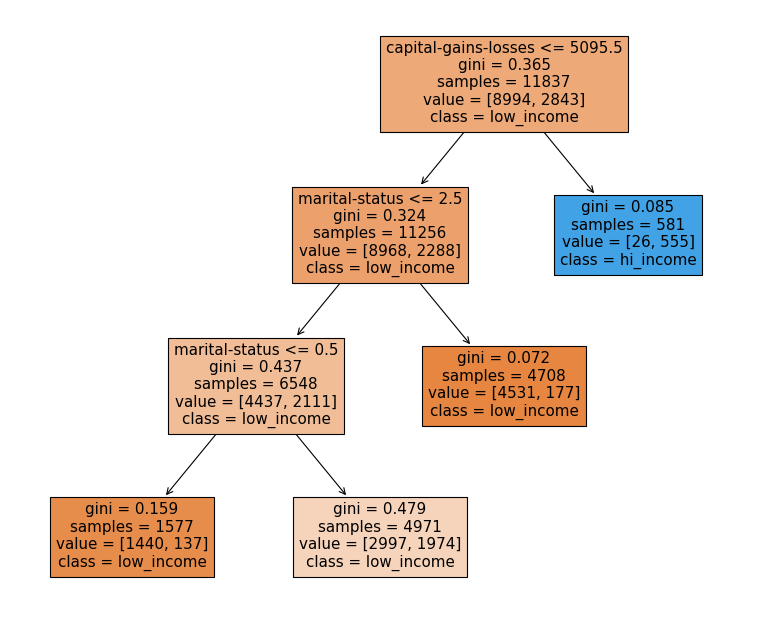

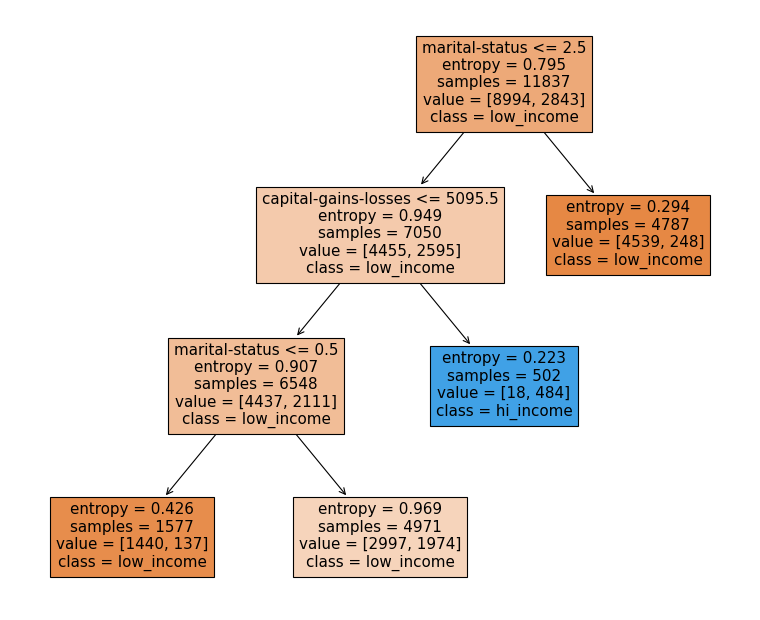

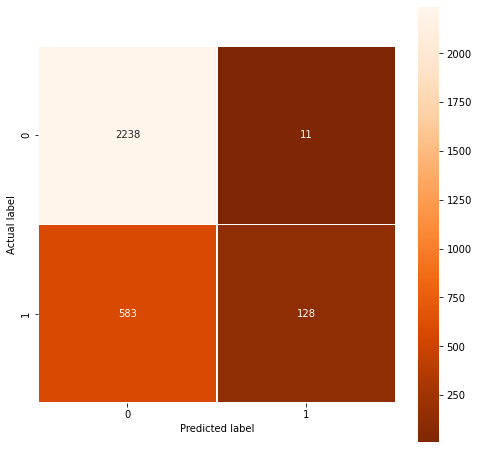

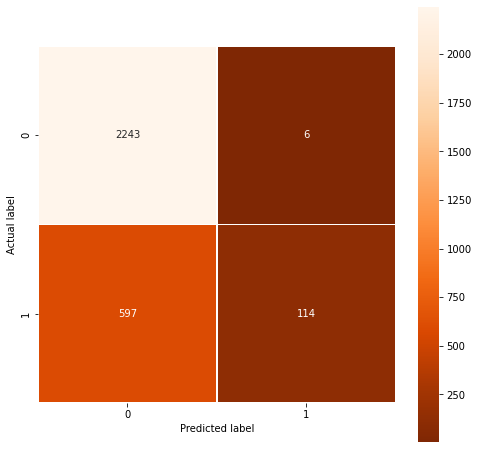

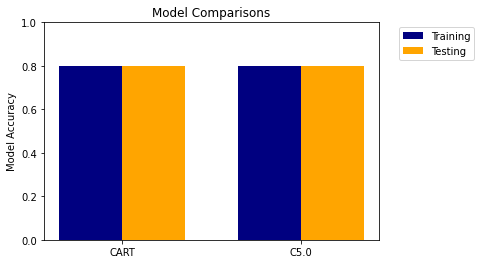

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1

[[2187   62]
 [ 511  200]]
[[2235   14]
 [ 583  128]]


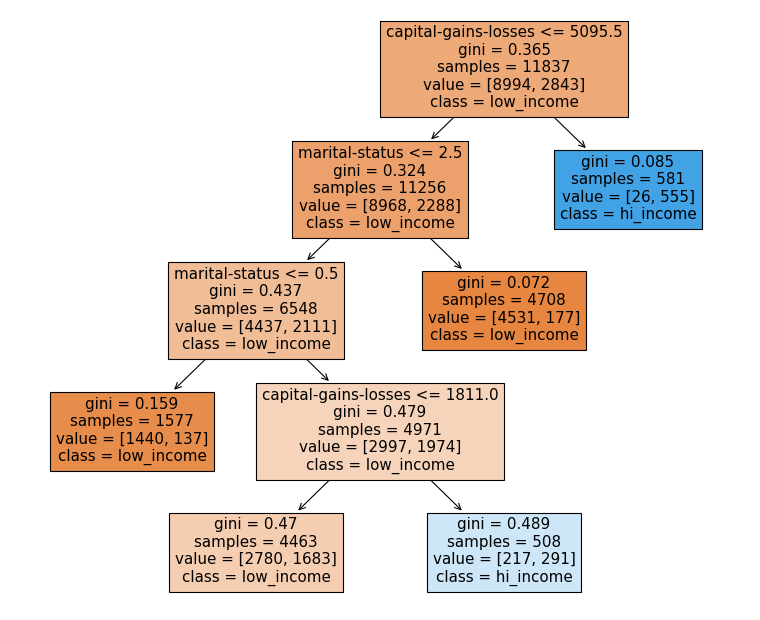

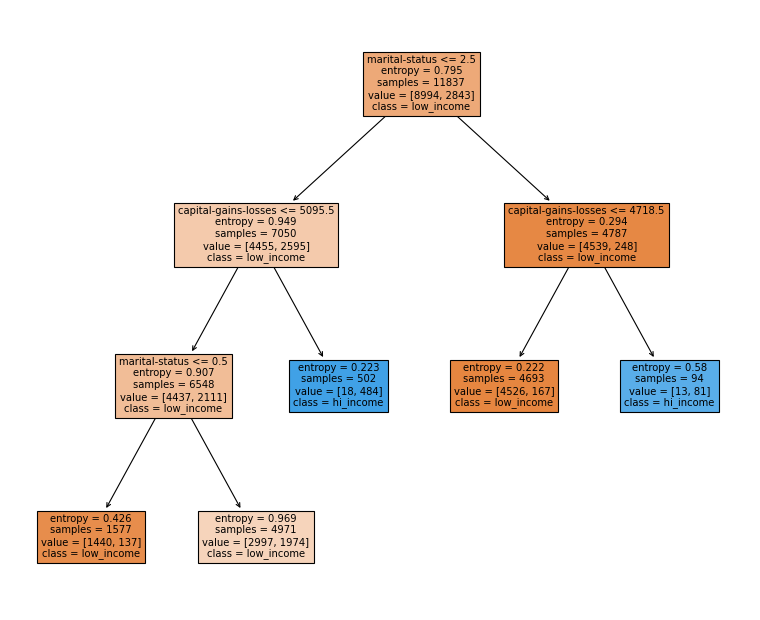

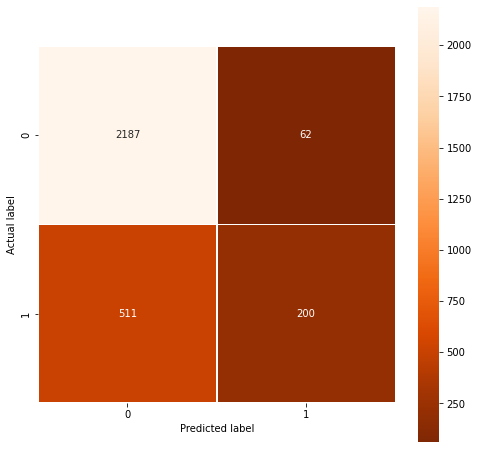

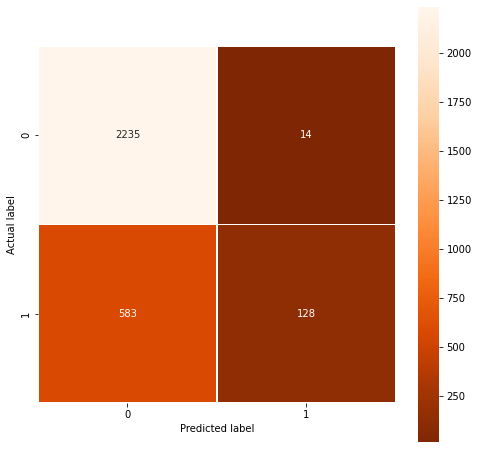

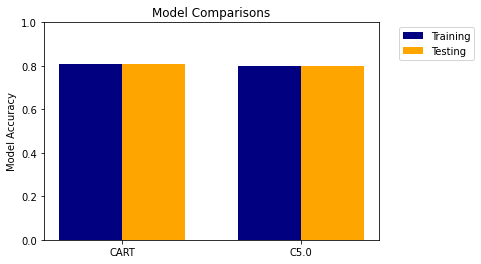

In [19]:
#Test different max_depth and max_leaf_nodes

#Tests with all set to None
cart1 = makeDTModel('gini',X_train,y_train,None) 
displayTree(cart1,X,None) 
c5_1 = makeDTModel('entropy',X_train,y_train,None) 
displayTree(c5_1,X,None) 
displayCM(cart1,X_train,y_train,X_test,y_test)
displayCM(c5_1,X_train,y_train,X_test,y_test)
compareModels(cart1,c5_1)


for i in range(2,5): #loop to test all max_depths 2-4
  for j in range(3,6): #loop to test all max_leaf_nodes 3-5
    cart1 = makeDTModel('gini',X_train,y_train,j) #Cart, Nodes: 3
    displayTree(cart1,X,i) #Cart, Nodes 3, depth 2
    c5_1 = makeDTModel('entropy',X_train,y_train,j) #c5, Nodes: 3
    displayTree(c5_1,X,i) #c5, Nodes 3, depth 2
    displayCM(cart1,X_train,y_train,X_test,y_test)
    displayCM(c5_1,X_train,y_train,X_test,y_test)
    compareModels(cart1,c5_1)

##Summary
---
After testing all of the possibilities at the end I didn't find any effect on accuracy by changing the leaf nodes or depth. All of the combinations tested showed about 0.8 for their accuracy, even though values in the CM differed between tests.